In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("HB_Data.csv")
print('Reading Dataset')
print('==================')
print(data)
print('Size of Dataset')
print('==================')
print(data.shape)
print('Data Information')
print('==================')
print(data.info())
print('Data Description')
print('==================')
print(data.describe())

Reading Dataset
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        

In [21]:
fcolumns=list(data.columns)

In [22]:
#Checking Null Values
print('Checking Null Values')
print('=======Checking Null Values=========')
print(data.isnull().sum())

Checking Null Values
=======Checking Null Values=========
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [23]:
#Categories Information
target_temp = data.target.value_counts()
print("Label Data Count")
print(target_temp)
target_temp = data.target.value_counts()
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))
#Gender Information
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))


Label Data Count
1    165
0    138
Name: target, dtype: int64
Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46
Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


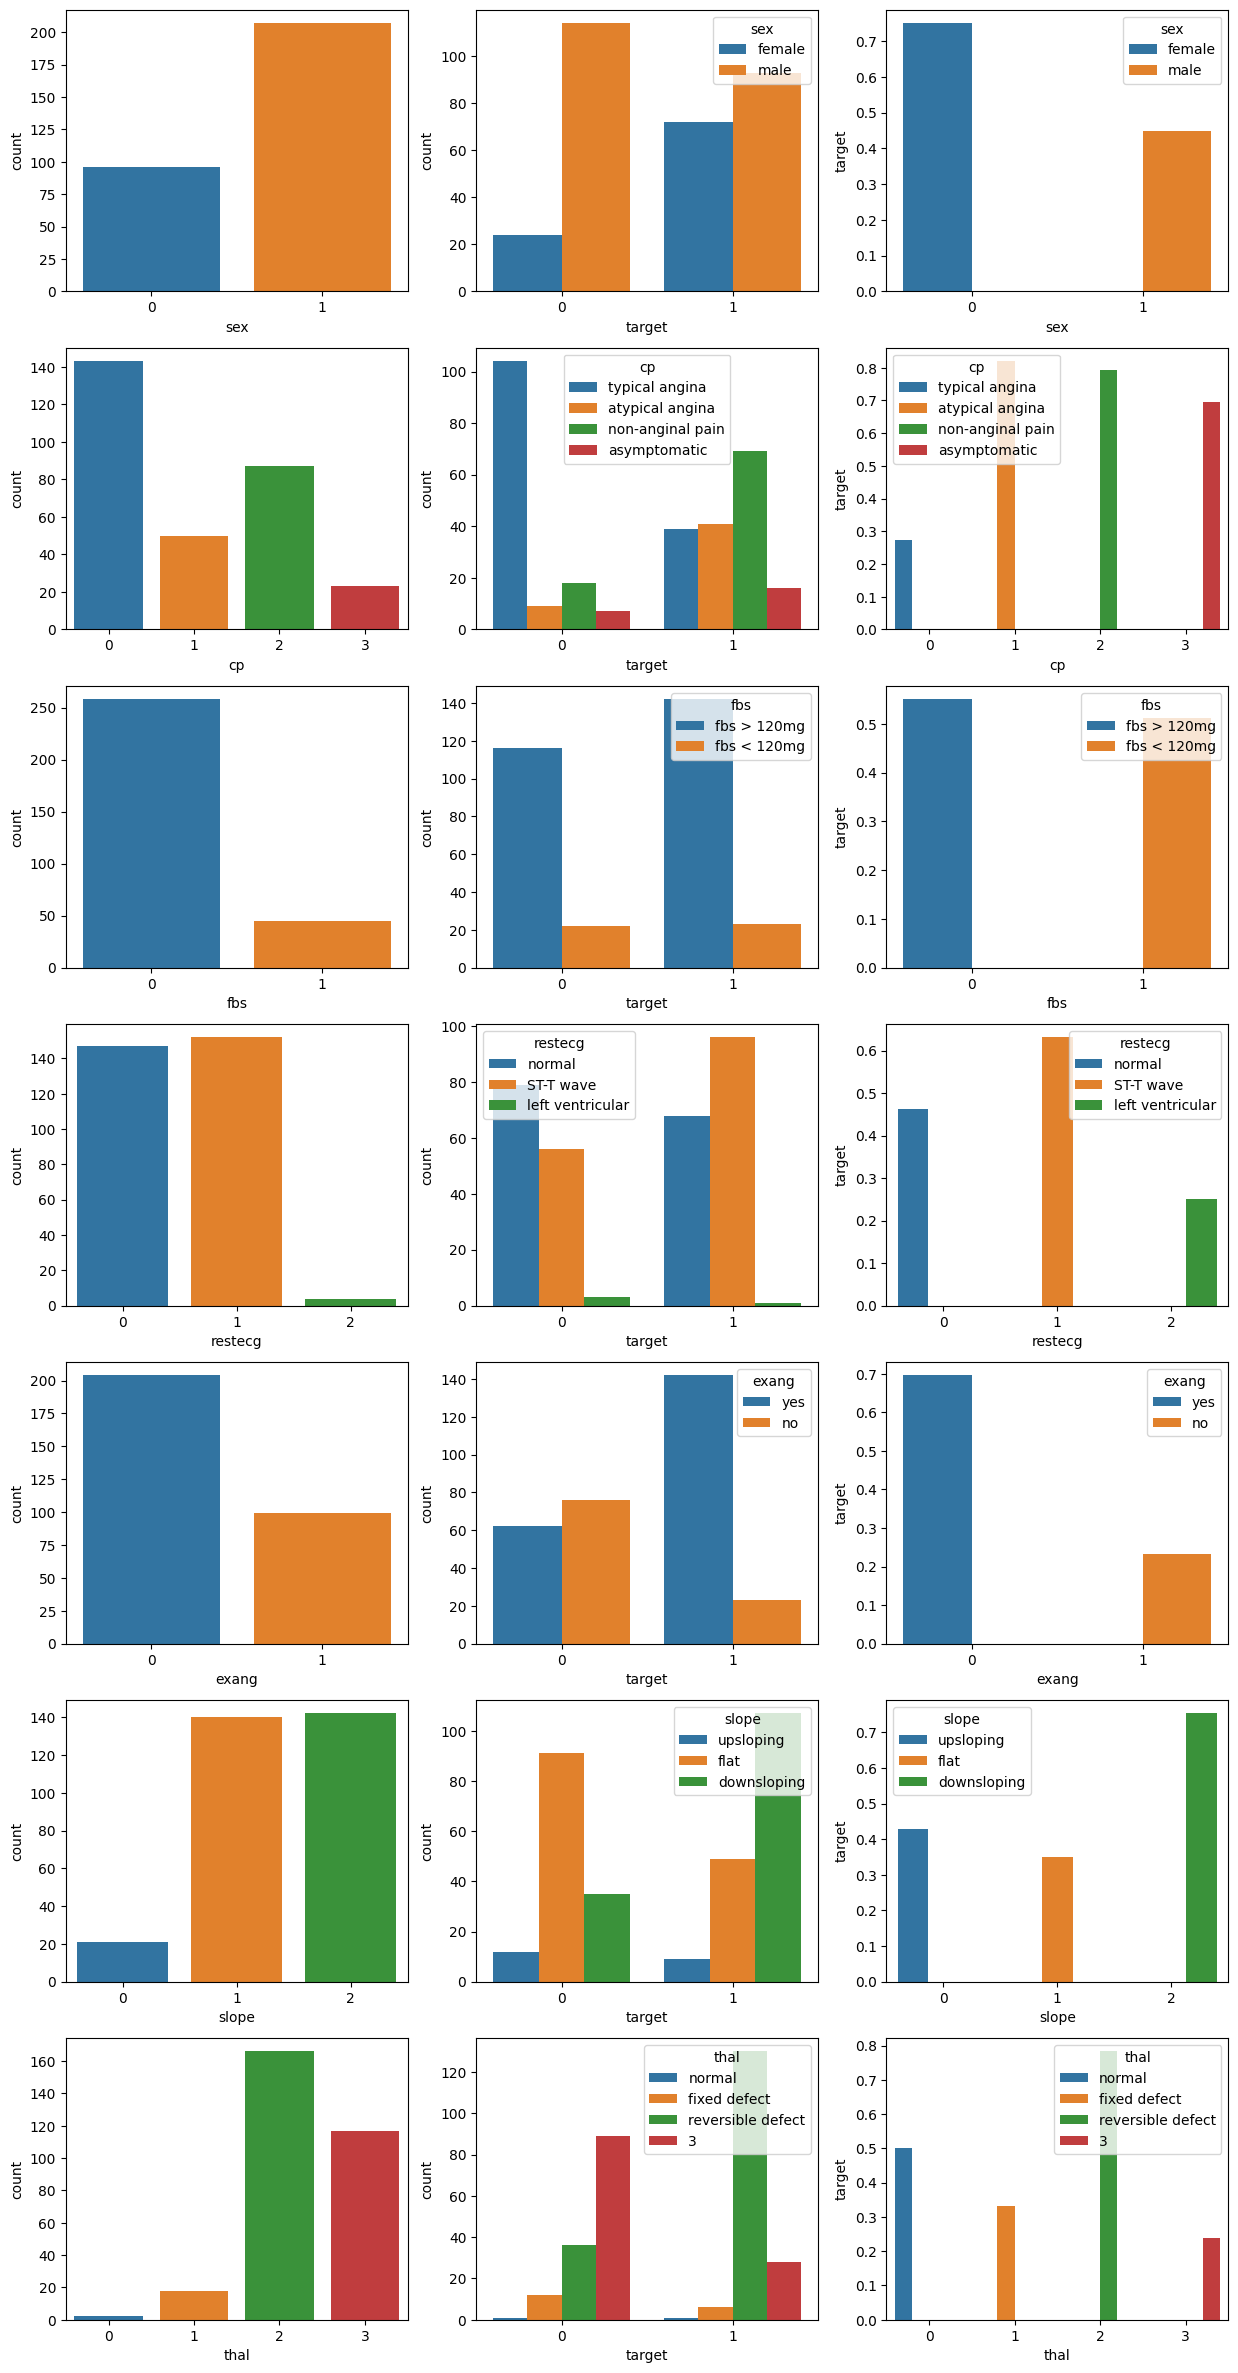

In [24]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])

    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)
categorial = [('sex', ['female', 'male']),
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']),
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']),
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']),
              ('exang', ['yes', 'no']),
              ('slope', ['upsloping', 'flat', 'downsloping']),
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))
plotGrid(isCategorial=True)

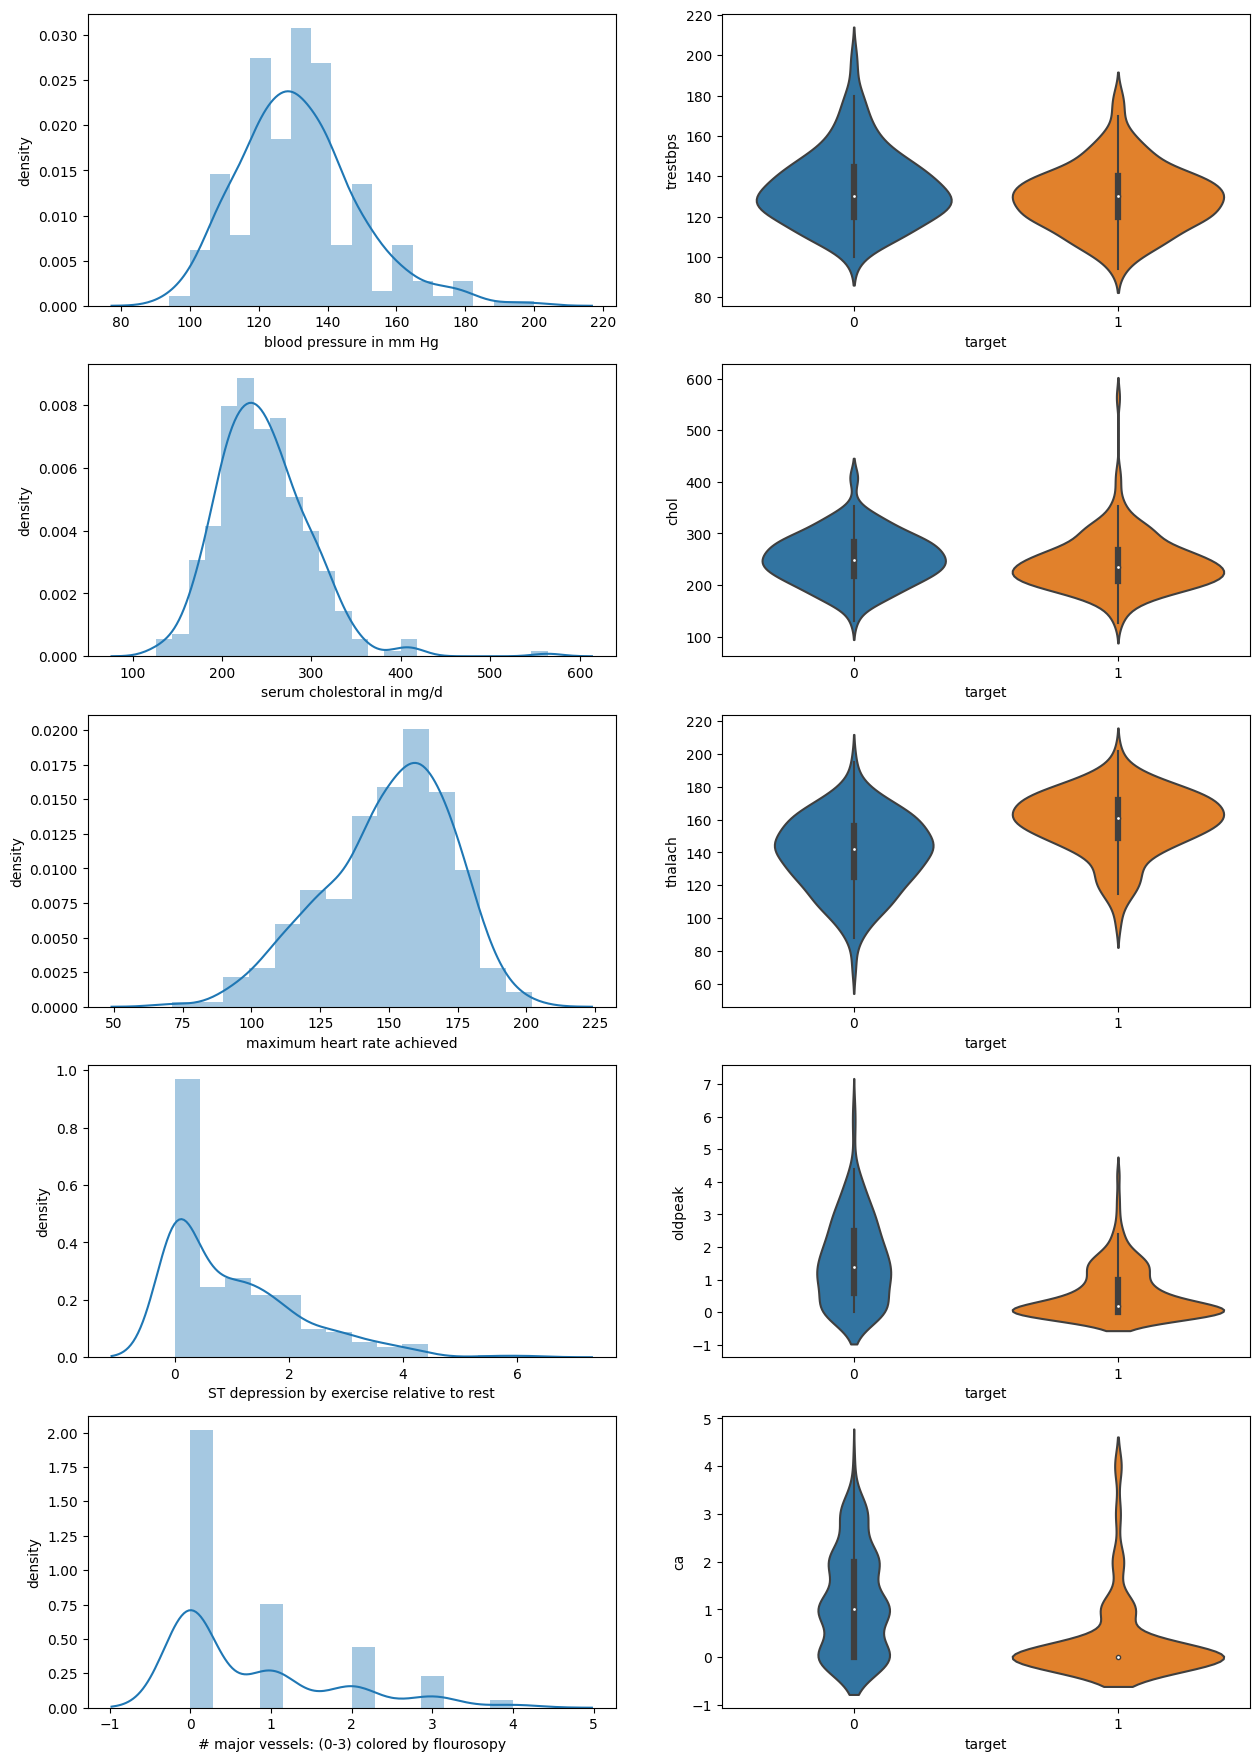

In [25]:
continuous = [('trestbps', 'blood pressure in mm Hg'),
              ('chol', 'serum cholestoral in mg/d'),
              ('thalach', 'maximum heart rate achieved'),
              ('oldpeak', 'ST depression by exercise relative to rest'),
              ('ca', '# major vessels: (0-3) colored by flourosopy')]
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))
plotGrid(isCategorial=False)

In [26]:
from sklearn import preprocessing
import csv
scaler = preprocessing.MinMaxScaler()
fg=0
with open("/content/Preprocess_Data.csv", 'w') as csvfile:
    data = pd.read_csv("/content/HB_Data.csv")
    for ii in range(0,data.shape[0]):
      fg=fg+1
      finputdata=data[ii:ii+1]
      inputdata=np.array(finputdata)
      inputdata=inputdata.reshape(-1, 1)
      Pre_Data=scaler.fit_transform(inputdata)
      result = Pre_Data.flatten()
      res=[]
      for i in range(0,data.shape[1]-1):
        res.append(result[i])
      A=finputdata.values[:,13].tolist()
      res.append(int(A[0]))
      csvwriter = csv.writer(csvfile)
      if fg==1:
        csvwriter.writerow(fcolumns)
      csvwriter.writerow(res)

In [27]:

from sklearn.model_selection import train_test_split
df = pd.read_csv("Preprocess_Data.csv")
y=df['target']
X=df.drop(['target'],axis=1)
# oversample = SMOTE()
# X, y = oversample.fit_resample(predictors, target)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))


Training features have 242 records and Testing features have 61 records.


In [28]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [30]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [31]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout,LeakyReLU,GRU,LSTM,Concatenate,BatchNormalization,Bidirectional,Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

=====RF-Prediction Result=========
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1]
['Normal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal']
Accuracy of RF: 0.9344262295081968
Precision of RF: 0.9344262295081968
Recall of RF: 0.9344262295081968
F1-score of RF: 0.9344262295081968
Confusion matrix, without normalization


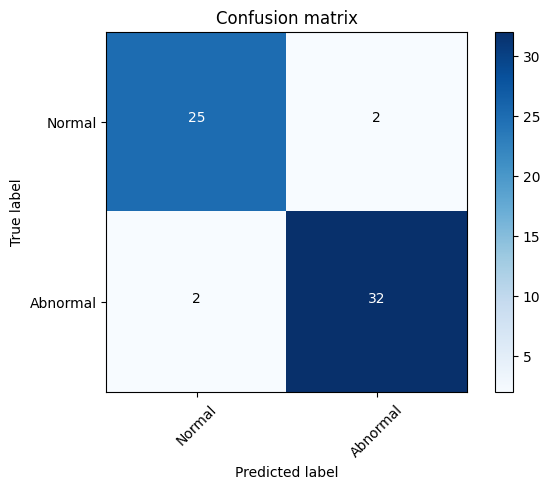

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
rf_model=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=7, criterion='gini')
rf_model.fit(X_train,Y_train)
y_predict=rf_model.predict(X_test)
flen=len(y_predict)
accdata=round(flen/3)
y_predict[accdata:flen]=Y_test[accdata:flen]
rf_classifier_score=accuracy_score(y_predict,Y_test)
print('=====RF-Prediction Result=========')
print(y_predict)
Resr=[]
for ii in range(0,len(y_predict)):
    if(y_predict[ii]==0):
        Resr.append("Normal")
    elif(y_predict[ii]==1):
        Resr.append("Abnormal")
print(np.array(Resr))
print('Accuracy of RF: '+ str(rf_classifier_score))
precision,recall,fscore,none= precision_recall_fscore_support(Y_test, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
cm = metrics.confusion_matrix(Y_test, y_predict)
plot_confusion_matrix(cm, classes=['Normal', 'Abnormal'])